In [ ]:
#Install the dependencies
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
#Store the data into a data frame
df = pd.read_csv('AAPL.csv')
df.head(9)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.591935,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.659609,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.800154,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.933965,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.913451,394024400
5,2012-01-10,15.211071,15.214286,15.053571,15.115714,12.959686,258196400
6,2012-01-11,15.095714,15.101786,14.975357,15.091071,12.938560,215084800
7,2012-01-12,15.081429,15.103571,14.955357,15.049643,12.903037,212587200
8,2012-01-13,14.989286,15.016071,14.952143,14.993214,12.854658,226021600


In [ ]:
#Get the number of trading days
df.shape

(2003, 7)

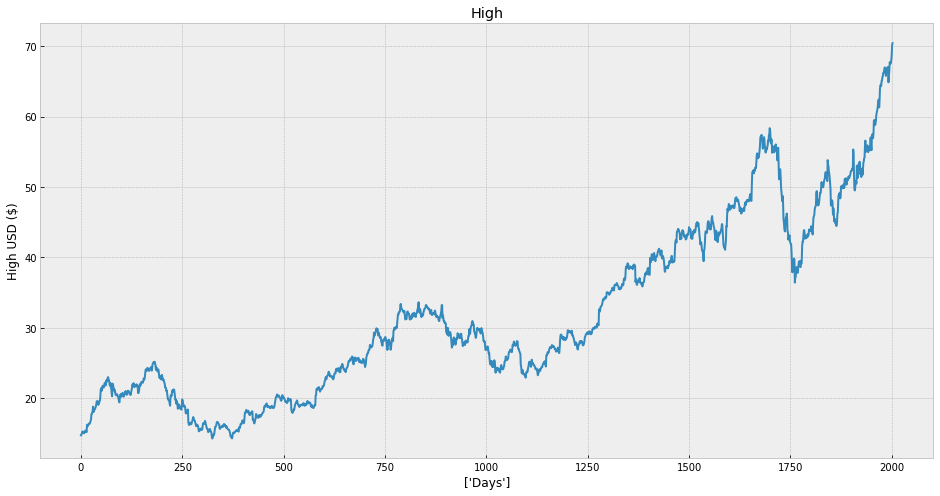

In [ ]:
#Visualize the High history
plt.figure(figsize=(16,8))
plt.title('High')
plt.xlabel(['Days'])
plt.ylabel('High USD ($)')
plt.plot(df['High'])
plt.show()

In [ ]:
#Create a new dataframe with only the 'close column'
data = df.filter(['Close'])
#Convert the dataframe to a nympy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len =( len(dataset) * .8 )
 
training_data_len

1602.4

In [ ]:
#Scale thedata
scaled_data = (dataset)

scaled_data


array([[14.686786],
       [14.765714],
       [14.929643],
       ...,
       [68.787498],
       [69.964996],
       [70.102501]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []


  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

IndentationError: ignored

In [ ]:
#Convert the x_train and y_train to nympy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the data to a nympy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

0.062497166763305835

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


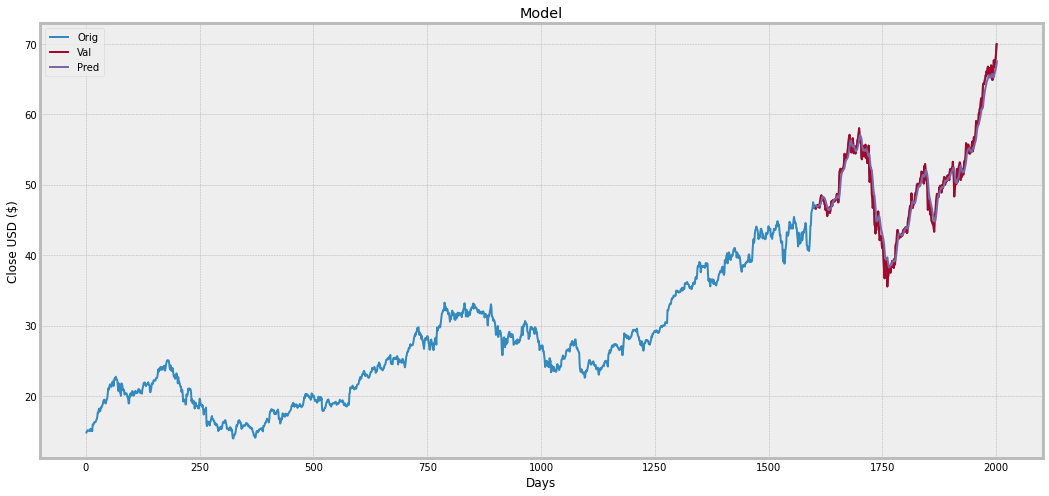

In [ ]:
#Visualize the data
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
1603,46.747501,47.151154
1604,46.577499,47.071575
1605,46.907501,46.950443
1606,46.790001,46.892750
1607,47.090000,46.851181
...,...,...
1998,67.692497,66.085068
1999,67.864998,66.380646
2000,68.787498,66.670509
2001,69.964996,67.079514
